In [1]:
#Import required libraries
import numpy as np
import pandas as pd





In [8]:
file_path = "/Users/aashvibudia/Documents/weatherAUS.csv"


data = pd.read_csv(file_path)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']]
y = data['RainTomorrow']  # Target variable


X = X.fillna(X.mean())
y = y.fillna(0)  


y = y.apply(lambda x: 1 if x == 'Yes' else 0)
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Update theta using the gradient
        gradient = (1 / m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= learning_rate * gradient

        # Store cost for plotting
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

In [11]:
theta = np.zeros(X.shape[1])  # Initialize theta (weights)
learning_rate = 0.01
iterations = 1000

# Convert y to numpy array
y = y.values


In [12]:
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Step 6: Make predictions
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

y_pred = predict(X, theta)


Model Accuracy: 82.51%


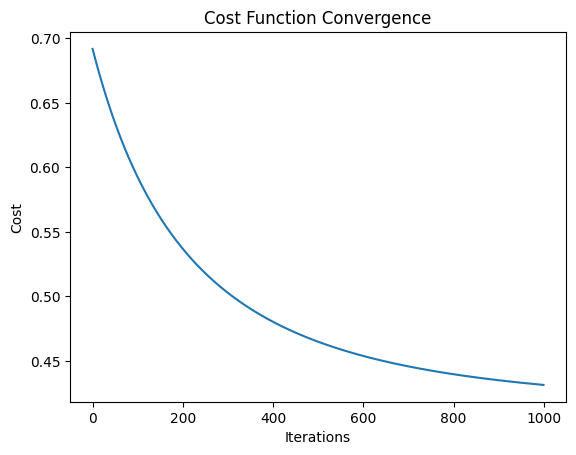

In [13]:
accuracy = np.mean(y_pred == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Step 8: Visualize cost history (optional)
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
